In [1]:
Threads.nthreads()

12

In [1]:
using Pkg
Pkg.add(PackageSpec(name="NCDatasets", rev="master"))
Pkg.add("Glob")
Pkg.add("GeoJSON")
Pkg.add("DataFrames")
Pkg.add("ArchGDAL")
Pkg.add("Plots")
#Pkg.add("ThreadPools")
#Pkg.add("Distributed")
Pkg.add("BenchmarkTools")

    Updating git-repo `https://github.com/Alexander-Barth/NCDatasets.jl.git`
    Updating registry at `C:\Users\scott\.julia\registries\General.toml`
   Resolving package versions...
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Manifest.toml`
   Resolving package versions...
  No Changes to `C:\Users\scott\.julia\environments\v1.8\Project.toml`
  No Changes to `C:\Users\scott\.julia\env

In [1]:
using NCDatasets
using Glob
using GeoJSON
using DataFrames
using ArchGDAL
using Plots
#using ThreadPools
#using Distributed
using BenchmarkTools

In [2]:
seasons = ["18-19"]#, '19-20', '20-21'] #['15-16','16-17', '17-18']
state = "Canada"

interpolate = 1 #interpolation factor: whether we can to augment the data through lat/lon interpolation; 1 no interpolation, 4 is 4x interpolation

#data_root = '/media/scottcha/Data2/OAPMLData/'
data_root = "F:/OAPMLData/"
n_jobs = 22

22

In [5]:
#ds = NCDataset(string(data_root,"/1.RawWeatherData/gfs/15-16/Canada/gfs.0p25.2015110100.f003.grib2.nc" ))

In [18]:
#mfds = NCDataset(glob(string(data_root,"/1.RawWeatherData/gfs/15-16/Canada/gfs.0p25.2015110100.f*.grib2.nc" )))
mfds = NCDataset(glob(string(data_root,"/1.RawWeatherData/gfs/15-16/Canada/gfs.0p25.20151101*.grib2.nc" )), _aggdimconstant=true)

NCDataset: F:OAPMLData\1.RawWeatherData\gfs\15-16\Canada\gfs.0p25.2015110100.f003.grib2.nc…F:OAPMLData\1.RawWeatherData\gfs\15-16\Canada\gfs.0p25.2015110100.f024.grib2.nc
Group: /

Dimensions
   latitude = 45
   longitude = 273
   time = 8

Variables
  latitude   (45)
    Datatype:    Float64
    Dimensions:  latitude
    Attributes:
     units                = degrees_north
     long_name            = latitude

  longitude   (273)
    Datatype:    Float64
    Dimensions:  longitude
    Attributes:
     units                = degrees_east
     long_name            = longitude

  time   (8)
    Datatype:    Float64
    Dimensions:  time
    Attributes:
     units                = seconds since 1970-01-01 00:00:00.0 0:00
     long_name            = verification time generated by wgrib2 function verftime()
     reference_time       = 1.446336e9
     reference_time_type  = 3
     reference_date       = 2015.11.01 00:00:00 UTC
     reference_time_description = forecast or accumulated, refer

In [52]:
files[1]

"F:OAPMLData\\1.RawWeatherData\\gfs\\15-16\\Canada\\gfs.0p25.2015110100.f003.grib2.nc"

In [12]:
methodswith(NCDataset)

[1] close(ds::NCDataset) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\dataset.jl:286
[2] keys(ds::NCDataset) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\dataset.jl:258
[3] write(dest::NCDataset, src::NCDatasets.AbstractDataset; include, exclude, idimensions) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\dataset.jl:490
[4] defDim(ds::NCDataset, name, len) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\dimensions.jl:111
[5] defGroup(ds::NCDataset, groupname; attrib) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\groupes.jl:40
[6] defVar(ds::NCDataset, name, vtype::DataType, dimnames; kwargs...) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\cfvariable.jl:114
[7] defVar(ds::NCDataset, name, data::AbstractArray{Union{Missing, nctype}, N}, dimnames; kwargs...) where {N, nctype<:Union{Float32, Float64, Int16, Int32, Int64, Int8, UInt8}} in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\cfvariable.jl:172
[8] defVar(ds::NCDataset, name, data::AbstractArray{<:Union{Missing, nctype}, N}, dimnames; kwargs...) where {N, nctype<:Union{Dates.DateTime, AbstractCFDateTime}} in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\cfvariable.jl:183
[9] defVar(ds::NCDataset, name, data::T; kwargs...) where T<:Union{Char, Number, String} in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\cfvariable.jl:255
[10] defVar(ds::NCDataset, name, data, dimnames; kwargs...) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\cfvariable.jl:191
[11] groupname(ds::NCDataset) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\groupes.jl:60
[12] path(ds::NCDataset) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\dataset.jl:265
[13] renameDim(ds::NCDataset, oldname, newname) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\dimensions.jl:118
[14] renameVar(ds::NCDataset, oldname::AbstractString, newname::AbstractString) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\variable.jl:43
[15] sync(ds::NCDataset) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\dataset.jl:274
[16] variable(ds::NCDataset, varid::Integer) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\variable.jl:57
[17] variable(ds::NCDataset, varname::Union{AbstractString, Symbol}) in NCDatasets at C:\Users\scott\.julia\packages\NCDatasets\gTGnf\src\variable.jl:75

In [3]:
#try reading each ds in sepeartely to fix a couple of issues:
#the multifile logic can cause the datasets to be read from disk N^(num vars) times 
#need to work around the sometimes missing variable problem 
files = glob(string(data_root,"/1.RawWeatherData/gfs/15-16/Canada/gfs.0p25.201*.grib2.nc"))
datasets = []
for f in files
    push!(datasets, NCDataset(f))
end

In [96]:
datasets[2]

closed NetCDF NCDataset

In [25]:
typeof(datasets[1])

NCDataset{Nothing}

In [4]:
regions_df2 = DataFrames.DataFrame(ArchGDAL.getlayer(ArchGDAL.read("C:/Users/scott/source/repos/OpenAvalancheProject/Data/CAAvalancheRegions.geojson"), 0))

Row,,name,type,url,externalUrl,forecastUrl,dangerIconUrl,owner,is_training,centroid,id
,IGeometry,String,String,String,Union…,String,String,String,Bool,Array…,String
1,Geometry: wkbPolygon,Little Yoho,parks,http://avalanche.pc.gc.ca/CAAML-eng.aspx?r=5&d=TODAY,http://avalanche.pc.gc.ca/bulletin-eng.aspx?r=5&d=TODAY,/api/forecasts/little-yoho.json,/api/forecasts/graphics/install-new-app.svg,parks-canada,true,"[-116.502, 51.5015]",little-yoho
2,Geometry: wkbPolygon,"Banff, Yoho and Kootenay National Parks",parks,http://avalanche.pc.gc.ca/CAAML-eng.aspx?r=1&d=TODAY,http://avalanche.pc.gc.ca/bulletin-eng.aspx?r=1&d=TODAY,/api/forecasts/banff-yoho-kootenay.json,/api/forecasts/graphics/install-new-app.svg,parks-canada,true,"[2.5e-323, 7.04541e-312]",banff-yoho-kootenay
3,Geometry: wkbPolygon,Northwest Coastal,avalx,https://avalanche.ca/forecasts/northwest-coastal,,/api/forecasts/northwest-coastal.json,/api/forecasts/graphics/install-new-app.svg,avalanche-canada,true,"[-129.777, 55.7003]",northwest-coastal
4,Geometry: wkbPolygon,Northwest Inland,avalx,https://avalanche.ca/forecasts/northwest-inland,,/api/forecasts/northwest-inland.json,/api/forecasts/graphics/install-new-app.svg,avalanche-canada,true,"[6.88982e228, 2.4487e-312]",northwest-inland
5,Geometry: wkbPolygon,Sea To Sky,avalx,https://avalanche.ca/forecasts/sea-to-sky,,/api/forecasts/sea-to-sky.json,/api/forecasts/graphics/install-new-app.svg,avalanche-canada,true,"[-117.618, 52.4456]",sea-to-sky
6,Geometry: wkbPolygon,South Coast Inland,avalx,https://avalanche.ca/forecasts/south-coast-inland,,/api/forecasts/south-coast-inland.json,/api/forecasts/graphics/install-new-app.svg,avalanche-canada,true,"[2.55e-321, 0.0]",south-coast-inland
7,Geometry: wkbMultiPolygon,South Coast,avalx,https://avalanche.ca/forecasts/south-coast,,/api/forecasts/south-coast.json,/api/forecasts/graphics/install-new-app.svg,avalanche-canada,true,"[-122.855, 49.5398]",south-coast
8,Geometry: wkbPolygon,North Rockies,avalx,https://avalanche.ca/forecasts/north-rockies,,/api/forecasts/north-rockies.json,/api/forecasts/graphics/install-new-app.svg,avalanche-canada,true,"[-121.461, 54.6686]",north-rockies
9,Geometry: wkbPolygon,Cariboos,avalx,https://avalanche.ca/forecasts/cariboos,,/api/forecasts/cariboos.json,/api/forecasts/graphics/install-new-app.svg,avalanche-canada,true,"[-120.591, 52.7209]",cariboos


In [46]:
#regions_df = DataFrame(GeoJSON.read(read("C:/Users/scott/source/repos/OpenAvalancheProject/Data/CAAvalancheRegions.geojson")))

In [47]:
#this could work but seems very slow
#ArchGDAL.contains(
#    (regions_df2[1,:])[1]   
#    , 
#    ArchGDAL.createpoint(-132.0, 48.0))

In [10]:
lats = mfds.ds[1]["latitude"]
lons = mfds.ds[1]["longitude"]

longitude (273)
  Datatype:    Float64
  Dimensions:  longitude
  Attributes:
   units                = degrees_east
   long_name            = longitude


In [11]:
min_lat = findmin(lats)[1]
max_lat = findmax(lats)[1]
min_lon = findmin(lons)[1]
max_lon = findmax(lons)[1]

-64.0

In [12]:
gfs_poly = ArchGDAL.createpolygon([(min_lon, min_lat), (min_lon, max_lat), (max_lon, max_lat), (max_lon, min_lat)])

Geometry: POLYGON ((-132 48,-132 59,-64 59,-64 48))

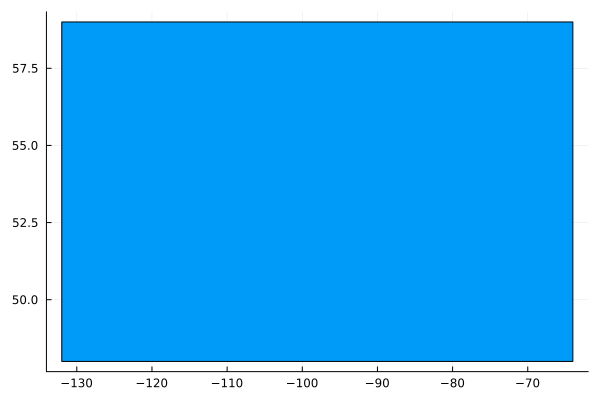

In [13]:
plot(gfs_poly)

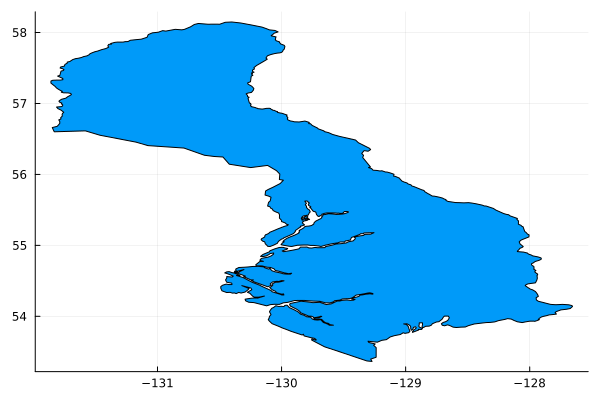

In [14]:
plot(regions_df2[3,:][1])

In [15]:
#1. grab a single lat/lon pair
#2. find if its in a regions_df
#3. create the dataset



In [5]:
#get a list of vars, lats and lons from first dataset
#load data in to memory once so its easier/faster to work with
latitude_dim = []
longitude_dim = []
time_dim = []
append!(latitude_dim, Array[datasets[1]["latitude"]][1])
append!(longitude_dim, Array[datasets[1]["longitude"]][1])


273-element Vector{Any}:
 -132.0
 -131.75
 -131.5
 -131.25
 -131.0
 -130.75
 -130.5
 -130.25
 -130.0
 -129.75
 -129.5
 -129.25
 -129.0
    ⋮
  -66.75
  -66.5
  -66.25
  -66.0
  -65.75
  -65.5
  -65.25
  -65.0
  -64.75
  -64.5
  -64.25
  -64.0

In [6]:
var_names = []
for (varname, var) in datasets[1] 
    println(varname)
    if varname in ["latitude", "longitude", "time"]
        continue
    else
        push!(var_names, varname)
    end
end

latitude
longitude
time
UGRD_localleveltype2200
VGRD_localleveltype2200
var0_2_224_localleveltype2200
GUST_surface
HGT_10mb
TMP_10mb
RH_10mb
UGRD_10mb
VGRD_10mb
ABSV_10mb
var0_14_192_10mb
HGT_20mb
TMP_20mb
RH_20mb
UGRD_20mb
VGRD_20mb
ABSV_20mb
var0_14_192_20mb
HGT_30mb
TMP_30mb
RH_30mb
UGRD_30mb
VGRD_30mb
ABSV_30mb
var0_14_192_30mb
HGT_50mb
TMP_50mb
RH_50mb
UGRD_50mb
VGRD_50mb
ABSV_50mb
var0_14_192_50mb
HGT_70mb
TMP_70mb
RH_70mb
UGRD_70mb
VGRD_70mb
ABSV_70mb
var0_14_192_70mb
HGT_100mb
TMP_100mb
RH_100mb
VVEL_100mb
UGRD_100mb
VGRD_100mb
ABSV_100mb
CLMR_100mb
var0_14_192_100mb
HGT_150mb
TMP_150mb
RH_150mb
VVEL_150mb
UGRD_150mb
VGRD_150mb
ABSV_150mb
CLMR_150mb
var0_14_192_150mb
HGT_200mb
TMP_200mb
RH_200mb
VVEL_200mb
UGRD_200mb
VGRD_200mb
ABSV_200mb
CLMR_200mb
var0_14_192_200mb
HGT_250mb
TMP_250mb
RH_250mb
VVEL_250mb
UGRD_250mb
VGRD_250mb
ABSV_250mb
CLMR_250mb
var0_14_192_250mb
HGT_300mb
TMP_300mb
RH_300mb
VVEL_300mb
UGRD_300mb
VGRD_300mb
ABSV_300mb
CLMR_300mb
var0_14_192_300mb
HGT_350mb


In [7]:
var_exclude_list = ["HLCY_3000M0maboveground", "PRES_tropopause", 
                    "ICAHT_tropopause", "PRMSL_meansealevel", 
                    "ICEC_surface", "LAND_surface", "VGRD_tropopause", 
                    "UGRD_tropopause", "TMP_tropopause", "HGT_tropopause"]

10-element Vector{String}:
 "HLCY_3000M0maboveground"
 "PRES_tropopause"
 "ICAHT_tropopause"
 "PRMSL_meansealevel"
 "ICEC_surface"
 "LAND_surface"
 "VGRD_tropopause"
 "UGRD_tropopause"
 "TMP_tropopause"
 "HGT_tropopause"

In [9]:
deleteat!(var_names, findall(x->x in var_exclude_list || 
                             startswith(x, "var0") || 
                             contains(x, "M2147D48") || 
                             contains(x, "2eM06") ||
                             contains(x, "255M0mb") || 
                             contains(x, "0D") ||
                             contains(x, "180M0") ||
                             contains(x, "30M0") ||
                             contains(x, "type2040") ||
                             contains(x, "0Cisotherm") || 
                             contains(x, "3658m") ||
                             contains(x, "2743m") || 
                             contains(x, "1829m") || 
                             contains(x, "100maboveground") ||
                             contains(x, "80maboveground") ||
                             contains(x, "maxwind") ||
                             contains(x, "localleveltype"), var_names))

219-element Vector{Any}:
 "GUST_surface"
 "HGT_10mb"
 "TMP_10mb"
 "RH_10mb"
 "UGRD_10mb"
 "VGRD_10mb"
 "ABSV_10mb"
 "HGT_20mb"
 "TMP_20mb"
 "RH_20mb"
 "UGRD_20mb"
 "VGRD_20mb"
 "ABSV_20mb"
 ⋮
 "TMP_2maboveground"
 "SPFH_2maboveground"
 "DPT_2maboveground"
 "RH_2maboveground"
 "APTMP_2maboveground"
 "UGRD_10maboveground"
 "VGRD_10maboveground"
 "CPOFP_surface"
 "var2_0_201_surface"
 "var2_3_203_surface"
 "CAPE_surface"
 "CIN_surface"

In [18]:
#10 threads takes 2.9 minutes loading from SATA ssd all vars 1 season
function load_data(datasets, var_names)
    var_dict = Dict()
    #allocate the memory for the Dict
    for varname in var_names
        d = Array{Union{Missing, Float32}, 3}(undef, length(longitude_dim), length(latitude_dim), length(datasets))
        var_dict[varname] = d
    end
    Threads.@threads for i in eachindex(datasets)
        println("    On dataset ", i)
        for varname in var_names
            var_dict[varname][:,:,i] = datasets[i][varname][:,:,:] 
        end
    end
    return var_dict
end

load_data (generic function with 1 method)

In [19]:
var_dict = load_data(datasets, var_names)

    On dataset 1215
    On dataset 367
    On dataset 731
    On dataset 610
    On dataset 123
    On dataset 1094
    On dataset 973
    On dataset 245
    On dataset 852
    On dataset 1336
    On dataset 489
    On dataset 1
    On dataset 2
    On dataset 246
    On dataset 368
    On dataset 611
    On dataset 732
    On dataset 974
    On dataset 124
    On dataset 1216
    On dataset 1337
    On dataset 490
    On dataset 1095
    On dataset 853
    On dataset 3
    On dataset 247
    On dataset 612
    On dataset 369
    On dataset 733
    On dataset 125
    On dataset 1338
    On dataset 1096
    On dataset 1217
    On dataset 975
    On dataset 491
    On dataset 854
    On dataset 4
    On dataset 613
    On dataset 248
    On dataset 126
    On dataset 734
    On dataset 1097
    On dataset 370
    On dataset 855
    On dataset 1218
    On dataset 1339
    On dataset 976
    On dataset 492
    On dataset 5
    On dataset 614
    On dataset 249
    On dataset 127
    On dat

Dict{Any, Any} with 219 entries:
  "HGT_975mb"    => [191.474 185.186 … 172.402 175.73; 192.514 186.402 … 172.00…
  "ABSV_600mb"   => [0.000201 0.000211 … 0.000132 0.000151; 0.000194 0.000201 ……
  "RH_70mb"      => [1.9 1.8 … 1.1 1.1; 2.0 1.9 … 1.1 1.1; … ; 2.7 2.7 … 2.1 2.…
  "VVEL_600mb"   => [0.118 -0.071 … 0.61 -1.087; 0.089 -0.106 … -0.278 -0.023; …
  "VGRD_975mb"   => [5.16 5.05 … -3.11 -3.46; 5.25 5.0 … -3.3 -3.31; … ; -1.5 -…
  "TMP_70mb"     => [218.0 218.2 … 219.1 219.0; 217.9 218.2 … 219.1 218.9; … ; …
  "UGRD_300mb"   => [39.3 35.7 … 9.7 11.1; 39.9 36.5 … 9.2 10.9; … ; 43.4 43.3 …
  "CLMR_100mb"   => [0.0 0.0 … 0.0 0.0; 0.0 0.0 … 0.0 0.0; … ; 0.0 0.0 … 0.0 0.…
  "CLMR_500mb"   => [0.0 3.0f-6 … 0.0 0.0; 0.0 5.0f-6 … 0.0 0.0; … ; 1.0f-6 0.0…
  "HGT_10mb"     => [30780.8 30775.9 … 30484.9 30475.7; 30780.8 30776.0 … 30483…
  "VGRD_20mb"    => [-2.9 -3.0 … -5.58 -5.65; -2.8 -2.92 … -5.51 -5.58; … ; -0.…
  "VVEL_400mb"   => [0.0256 0.0214 … 0.0918 -0.4234; 0.0228 -0.0016 … 0.0024

In [94]:
var_dict = Dict()
for varname in var_names
    println("On var ", varname)
    d = Array{Union{Missing, Float32}, 3}(undef, length(longitude_dim), length(latitude_dim), length(datasets))
    for i in eachindex(datasets)
        #println("    On dataset ", i)
        d[:,:,i] = datasets[i][varname][:,:,:] 
        var_dict[varname] = d
    end
end

On var TCDC_localleveltype2440
On var PRES_localleveltype2430
On var PRES_localleveltype2420
On var TOZNE_localleveltype2000
On var RH_localleveltype2000
On var CWAT_localleveltype2000
On var PWAT_localleveltype2000
On var CIN_surface
On var CAPE_surface
On var var2_3_203_surface
On var var2_0_201_surface
On var CPOFP_surface
On var VGRD_10maboveground
On var UGRD_10maboveground
On var APTMP_2maboveground
On var RH_2maboveground
On var DPT_2maboveground
On var SPFH_2maboveground
On var TMP_2maboveground
On var SNOD_surface
On var WEASD_surface
On var var2_0_192_1M2mbelowground
On var TSOIL_1M2mbelowground
On var TMP_surface
On var HGT_surface
On var PRES_surface
On var HGT_1000mb
On var CLMR_1000mb
On var ABSV_1000mb
On var VGRD_1000mb
On var UGRD_1000mb
On var VVEL_1000mb
On var RH_1000mb
On var TMP_1000mb
On var CLMR_975mb
On var ABSV_975mb
On var VGRD_975mb
On var UGRD_975mb
On var VVEL_975mb
On var RH_975mb
On var TMP_975mb
On var HGT_975mb
On var HINDEX_surface
On var CLMR_950mb
O

In [101]:
var_dict["GUST_surface"][:,:,11]

273×45 Matrix{Union{Missing, Float32}}:
 12.8  12.7  12.6  12.5  12.4  12.4  …  1.0  1.1  2.3  3.2  2.7  2.2  1.7
 12.9  12.8  12.7  12.6  12.5  12.4     1.4  0.8  1.5  2.3  2.9  3.0  2.1
 12.7  12.7  12.8  12.8  12.7  12.6     1.9  1.9  1.0  1.2  2.8  2.9  2.0
 12.9  12.8  12.9  12.9  12.8  12.7     1.3  2.0  1.2  0.7  2.2  2.6  1.7
 13.0  12.9  13.0  13.0  13.0  12.9     1.1  2.0  1.5  0.4  1.4  1.9  1.5
 13.0  13.0  13.2  13.2  13.2  13.1  …  1.1  1.5  1.6  0.8  0.8  1.4  1.2
 13.0  13.1  13.3  13.3  13.3  13.2     1.0  1.0  1.2  1.2  0.8  1.0  0.9
 12.9  13.1  13.2  13.4  13.4  13.2     0.7  0.9  0.4  1.2  1.2  1.0  0.9
 12.9  13.1  13.2  13.4  13.4  13.2     0.5  0.8  0.4  1.0  1.6  1.1  1.3
 12.9  13.0  13.1  13.4  13.3  13.2     0.5  0.9  1.1  0.4  1.6  1.3  1.8
 12.9  12.9  13.2  13.2  13.3  13.1  …  0.8  0.9  1.5  1.0  1.5  1.5  2.5
 12.8  13.0  13.1  13.2  13.1  13.1     1.1  1.1  1.4  1.5  1.4  1.6  2.8
 12.7  12.9  13.0  13.0  12.8  12.6     1.3  1.5  1.3  1.3  1.2  1.7  2.

In [32]:
var_dict["GUST_surface"][:,:,2] = var_dict["GUST_surface"]

LoadError: BoundsError: attempt to access 273×45×1 Array{Union{Missing, Float32}, 3} at index [1:273, 1:45, 2]

In [ ]:
#load data in to memory once so its easier/faster to work with

single_lat_lon = NCDatasets.@select(mfds, latitude==$latitude_dim[1] && longitude==$longitude_dim[1] )
var_dict = Dict()

for (varname, var) in single_lat_lon
    println(varname)
    if varname in ["latitude", "longitude", "time"]
        continue
    else
        var_dict[varname] = mfds[varname][:,:,:] :: Array{Union{Missing, Float32}, 3}
    end
end

In [48]:
#load data in to memory once so its easier/faster to work with
latitude_dim = []
longitude_dim = []
time_dim = []
append!(latitude_dim, Array[mfds["latitude"]][1])
append!(longitude_dim, Array[mfds["longitude"]][1])
append!(time_dim, Array[mfds["time"]][1])

single_lat_lon = NCDatasets.@select(mfds, latitude==$latitude_dim[1] && longitude==$longitude_dim[1] )
var_dict = Dict()

for (varname, var) in single_lat_lon
    println(varname)
    if varname in ["latitude", "longitude", "time"]
        continue
    else
        var_dict[varname] = mfds[varname][:,:,:] :: Array{Union{Missing, Float32}, 3}
    end
end

latitude
longitude
time
UGRD_localleveltype2200
VGRD_localleveltype2200
var0_2_224_localleveltype2200
GUST_surface
HGT_10mb
TMP_10mb
RH_10mb
UGRD_10mb
VGRD_10mb
ABSV_10mb
var0_14_192_10mb
HGT_20mb
TMP_20mb
RH_20mb
UGRD_20mb
VGRD_20mb
ABSV_20mb
var0_14_192_20mb
HGT_30mb
TMP_30mb
RH_30mb
UGRD_30mb
VGRD_30mb
ABSV_30mb
var0_14_192_30mb
HGT_50mb
TMP_50mb
RH_50mb
UGRD_50mb
VGRD_50mb
ABSV_50mb
var0_14_192_50mb
HGT_70mb
TMP_70mb
RH_70mb
UGRD_70mb
VGRD_70mb
ABSV_70mb
var0_14_192_70mb
HGT_100mb
TMP_100mb
RH_100mb
VVEL_100mb
UGRD_100mb
VGRD_100mb
ABSV_100mb
CLMR_100mb
var0_14_192_100mb
HGT_150mb
TMP_150mb
RH_150mb
VVEL_150mb
UGRD_150mb
VGRD_150mb
ABSV_150mb
CLMR_150mb
var0_14_192_150mb
HGT_200mb
TMP_200mb
RH_200mb
VVEL_200mb
UGRD_200mb
VGRD_200mb
ABSV_200mb
CLMR_200mb
var0_14_192_200mb
HGT_250mb
TMP_250mb
RH_250mb
VVEL_250mb
UGRD_250mb
VGRD_250mb
ABSV_250mb
CLMR_250mb
var0_14_192_250mb
HGT_300mb
TMP_300mb
RH_300mb
VVEL_300mb
UGRD_300mb
VGRD_300mb
ABSV_300mb
CLMR_300mb
var0_14_192_300mb
HGT_350mb


LoadError: NetCDF error: [31mVariable 'HLCY_3000M0maboveground' not found in file F:OAPMLData\1.RawWeatherData\gfs\15-16\Canada\gfs.0p25.2016011600.f012.grib2.nc[39m (NetCDF error code: -49)

In [28]:

#= #8 days single region single thread 30min
var_names = []
dates = Array[single_lat_lon["time"]]
lat_lons = []
ts_data = [] #ultimately want (samples, features, timesteps)
for lat in lats
    for lon in lons
        data = []
        if(ArchGDAL.contains( regions_df2[3,:][1], ArchGDAL.createpoint(lon, lat)))
            println(lat, " ", lon)
            single_lat_lon = NCDatasets.@select(mfds, latitude==$lat && longitude==$lon )
            for (varname, var) in single_lat_lon
                if varname in ["latitude", "longitude", "time"]
                    continue
                end
                push!(var_names, varname)
                push!(data, Array[single_lat_lon[varname]][1][:])
            end

           push!(ts_data, reduce(hcat, data)') 
        end
    end
end
final_values = Array{Union{Float32,Missing}}(undef,124,326,8)
for i in eachindex(ts_data)
    final_values[i,:,:] = ts_data[i]
end =#


In [29]:
#create lat/lon list
lat_lon_list = []
for lat in latitude_dim 
    for lon in longitude_dim
        push!(lat_lon_list,(lat,lon))
    end
end

In [31]:
#smaller list of lat/lon known to be contained in region[3] for testing
check_latlon = []
tmp_region = regions_df2[3,:]
for p in lat_lon_list
    if(ArchGDAL.contains(tmp_region[1], ArchGDAL.createpoint(p[2], p[1])))
        push!(check_latlon, p)
    end
end

In [32]:
#threaded version which reads from file, no faster than single threaded to to extensive locking of the file
# lk = ReentrantLock()

# function data_for_lat_lon(ds, region, lat_lon_pair)
#     println("have latlon piar ", lat_lon_pair)
#     lat = lat_lon_pair[1]
#     lon = lat_lon_pair[2]
#     data = []
#     if(ArchGDAL.contains(region[1], ArchGDAL.createpoint(lon, lat)))
#         #println(lat, " ", lon)
#         single_lat_lon = nothing
#         lock(lk) do
#             single_lat_lon = NCDatasets.@select(ds, latitude==$lat && longitude==$lon)
        
#             for (varname, var) in single_lat_lon
#                 if varname in ["latitude", "longitude", "time"]
#                     continue
#                 end
#                 #push!(var_names, varname)
#                 push!(data, Array[single_lat_lon[varname]][1][:])
#             end
#         end
#         return reduce(hcat, data)'
#     end
#     return nothing
# end

In [33]:
function data_for_lat_lon_in_memory(variable_dict, region, lat_lon_pair)
    #println("have latlon piar ", lat_lon_pair)
    lat = lat_lon_pair[1]
    lon = lat_lon_pair[2]
    data = []
    if(ArchGDAL.contains(region[1], ArchGDAL.createpoint(lon, lat)))
        #println(lat, " ", lon)
        single_lat_lon = nothing
        for varname in keys(variable_dict)
            #TODO: this seems to be a lot of overhead for looking up indexes; find a faster way 
            tmp = variable_dict[varname][findfirst(x -> x==lat, latitude_dim), findfirst(x -> x==lon, longitude_dim), :]
            push!(data, tmp) 
        end
        return reduce(hcat, data)'
    end
    return nothing
end

data_for_lat_lon_in_memory (generic function with 1 method)

In [34]:
function create_data(var_dict, regions_df2)
    ret_val = []
    for item in check_latlon[1:24] 
        tmp_ret = data_for_lat_lon_in_memory(var_dict, regions_df2[3,:], item)
        if tmp_ret != nothing
            push!(ret_val, tmp_ret)
        end
    end
    return ret_val
end

create_data (generic function with 1 method)

In [35]:
function create_data_threaded(var_dict, regions_df2)
    ret_val = []
    Threads.@threads for item in check_latlon[1:24] 
        tmp_ret = data_for_lat_lon_in_memory(var_dict, regions_df2[3,:], item)
        if tmp_ret != nothing
            push!(ret_val, tmp_ret)
        end
    end
    return ret_val
end

create_data_threaded (generic function with 1 method)

In [41]:
#1 thread 23.41 ms in jupyter
@benchmark val = create_data(var_dict, regions_df2)

BenchmarkTools.Trial: 171 samples with 1 evaluation.
 Range (min … max):  23.576 ms … 44.152 ms  ┊ GC (min … max):  0.00% … 23.56%
 Time  (median):     26.695 ms              ┊ GC (median):     0.00%
 Time  (mean ± σ):   29.260 ms ±  5.464 ms  ┊ GC (mean ± σ):  10.46% ± 13.33%

  ▁     ▂█▃▁▄▁▅ ▅                                              
  █▇█▇▇▇███████▇█▅▄▁▁▁▁▃▃▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄▃▄▃▆▄▆▅▁▇▆▇▄▅▆▅▄ ▃
  23.6 ms         Histogram: frequency by time        39.5 ms <

 Memory estimate: 55.76 MiB, allocs estimate: 333066.

In [42]:
#12 threads between 8 & 16.8 ms in jupyter 
@benchmark val = create_data_threaded(var_dict, regions_df2)

BenchmarkTools.Trial: 104 samples with 1 evaluation.
 Range (min … max):   9.309 ms …    1.117 s  ┊ GC (min … max):  0.00% … 96.58%
 Time  (median):     16.823 ms               ┊ GC (median):     0.00%
 Time  (mean ± σ):   48.220 ms ± 150.248 ms  ┊ GC (mean ± σ):  42.11% ± 13.21%

  █  ▂                                                          
  █▄▅██▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▁▄ ▄
  9.31 ms       Histogram: log(frequency) by time       1.09 s <

 Memory estimate: 55.77 MiB, allocs estimate: 333093.

In [ ]:
final_values = Array{Union{Float32,Missing}}(undef,124,326,8)
for i in eachindex(ret_val)
    final_values[i,:,:] = ret_val[i]
end

In [38]:
#33mins using 22 @threads
#24 samples took 6.5 mins 22 threads, same w/ 12 threads
# ret_val = []
# Threads.@threads for item in check_latlon[1:24] 
#     tmp_ret = data_for_lat_lon(mfds, regions_df2[3,:], item)
#     if tmp_ret != nothing
#         push!(ret_val, tmp_ret)
#     end
# end

In [39]:
#pool = logqbforeach(x -> data_for_lat_lon(mfds, regions_df2[3,:], x), check_latlon[1:14])

In [40]:
#plot(pool)

In [40]:
final_values[15,1,:]

8-element Vector{Union{Missing, Float32}}:
 -3.0f0
 -2.0f0
 -2.0f0
 -2.0f0
 -1.0f0
 -1.0f0
  0.0f0
  1.0f0